# Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the:
 - Department of Education, Training and Employment (DETE)
 - Technical and Further Education (TAFE)
Both institutes in Queensland, Australia. You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

Project objectives:

 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will need to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.

A data dictionary wasn't provided with the dataset.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:
 - `ID`: An id used to identify the participant of the survey
 - `SeparationType`: The reason why the person's employment ended
 - `Cease Date`: The year or month the person's employment ended
 - `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:
 - `Record ID`: An id used to identify the participant of the survey
 - `Reason for ceasing employment`: The reason why the person's employment ended
 - `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)



### 1. Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('C:/Users/Daniel Mendes/Projects/Databases/dete_survey.csv',na_values='Not Stated')
tafe_survey = pd.read_csv('C:/Users/Daniel Mendes/Projects/Databases/tafe_survey.csv')

### 2. Exploring the datasets

In [2]:
print(dete_survey.info())
print(tafe_survey.info())

display(dete_survey.head())
display(tafe_survey.head())

print('-----DETE-----')
print(dete_survey.isnull().sum())
print('\n')
print('-----TAFE-----')
print(tafe_survey.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


-----DETE-----
ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                           

### 3.Dropping any data not needed for our analysis
Let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.

In [3]:
# drop unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

| <center>dete_survey | <center>tafe_survey | <center>Definition |
|:---:|:---:|:---|
| `ID` | `Record ID` | An id used to identify the participant of the survey |
| `SeparationType` | `Reason for ceasing employment` | The reason why the participant's employment ended |
| `Cease Date` | `CESSATION YEAR` | The year or month the participant's employment ended |
| `DETE Start Date` |  | The year the participant began employment with the DETE |
|  | `LengthofServiceOverall. Overall Length of Service at Institute (in years)` | The length of the person's employment (in years) |
| `Age` | `CurrentAge. Current Age` | The age of the participant |
| `Gender` | `Gender. What is your Gender?` | The gender of the participant | 

### 4. Modifying & standardizing headers

In [4]:
# modify & standardize header
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
new_columns = {'Record ID':'id',
               'CESSATION YEAR':'cease_date',
               'Reason for ceasing employment':'separationtype',
               'Gender. What is your Gender?':'gender',
               'CurrentAge. Current Age':'age',
               'Employment Type. Employment Type':'employment_status',
               'Classification. Classification':'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated.rename(new_columns, axis=1, inplace=True)

### 5. Creating new datasets only with resignations - `dete_resignations` and `tafe_resignations`

In the last step, we renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:
 - Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string **'Resignation'**.

In [5]:
display(dete_survey_updated['separationtype'].value_counts(dropna=False))
display(tafe_survey_updated['separationtype'].value_counts(dropna=False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [6]:
# copy separationtype rows using regex and vectorized string methods
pattern = r"Resignation"
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains(pattern, regex=True)].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains(pattern, regex=True, na=False)].copy()

display(dete_resignations["separationtype"].value_counts(dropna=False))
display(tafe_resignations["separationtype"].value_counts(dropna=False))

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

Resignation    340
Name: separationtype, dtype: int64

### 6. Checking the quality of the data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies. 

In the next step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.

1. Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
2. Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.
If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [7]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [8]:
# dete_start_date > 1940
dete_resignations = dete_resignations[dete_resignations["dete_start_date"] > 1940]

# dete_start_date < role_start_date < cease_date
dete_resignations = dete_resignations[dete_resignations["role_start_date"] > 1940]
dete_resignations = dete_resignations[dete_resignations["role_start_date"] < 2022]

# cease_date < current date
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.replace(r"[0-9][0-9]/", "", regex=True).astype(float)
dete_resignations = dete_resignations[dete_resignations["cease_date"] < 2022]

<AxesSubplot:>

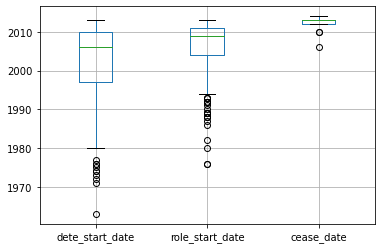

In [9]:
dete_resignations.boxplot(column=["dete_start_date", "role_start_date", "cease_date"])

In [10]:
display(dete_resignations[ "cease_date"].value_counts())
display(tafe_resignations['cease_date'].value_counts())

2013.0    124
2012.0    113
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

### 7. Creating a new `institute_service` column

In [11]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

### 8. Cleaned the Contributing Factors columns

In [12]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].value_counts(dropna=False)

Contributing Factors. Dissatisfaction  Contributing Factors. Job Dissatisfaction
False                                  False                                        241
                                       True                                          36
True                                   False                                         29
                                       True                                          26
NaN                                    NaN                                            8
dtype: int64

### 9. Created a new column indicating if an employee resigned because they were dissatisfied in some way

In [13]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
display(tafe_resignations['dissatisfied'].value_counts(dropna=False))
# inspect all three columns for logical errors
tafe_resignations = tafe_resignations.reindex()
display(tafe_resignations.loc[39:53,['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction',
                           'dissatisfied']])

False    241
True      99
Name: dissatisfied, dtype: int64

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,dissatisfied
39,False,False,False
40,True,False,True
41,False,False,False
42,False,False,False
45,False,False,False
46,False,False,False
47,True,False,True
49,False,False,False
51,NaN,NaN,True
52,False,True,True


In [14]:
# create new DETE column `dissatisfied` using .any()
dete_resig_factors = ["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment",
                      "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions",
                      "work_life_balance", "workload"]
dete_resignations["dissatisfied"] = dete_resignations[dete_resig_factors].any(axis=1, skipna=True)
display(dete_resignations["dissatisfied"].value_counts())

True     132
False    130
Name: dissatisfied, dtype: int64

### 10. Combining the datasets

In [15]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'
combined = pd.concat([dete_resignations,tafe_resignations], ignore_index=True)
combined = combined.dropna(axis=1, thresh=500)
display(combined.head())
display(combined.tail())

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
597,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
598,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
599,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
600,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE
601,6.350730e+17,Resignation,2013.0,Administration (AO),Contract/casual,Female,26 30,3-4,False,TAFE


### 11. Cleaning `institute_service` column before analysis

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the institute_service column. This column is tricky to clean because it currently contains values in a couple different forms:

|institute_service | Count |
| :---: | :---: |
| NaN | 88 |
| Less than 1 year | 73 |
| 1-2 | 64 |
| 3-4 | 63 |
| 5-6 | 33 |
| 11-20 | 26 |
| 5.0 | 23 |
| 1.0 | 22 |
| 7-10 | 21 |
| 0.0 | 20 |
| ... | ... |

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Let's categorize the values in the institute_service column using the definitions above.

In [16]:
changes = {'Less than 1 year':'0',
           '1-2':'1',
           '3-4':'3',
           '5-6':'5',
           '7-10':'7',
           '11-20':'11',
           'More than 20 years':'20'
          }

combined = combined.replace({"institute_service":changes})
combined["institute_service"] = combined["institute_service"].astype(float)

def service_changer(element):
    if element < 3:
        return "New"
    elif element < 7:
        return "Experienced"
    elif element < 11:
        return "Established"
    elif pd.isnull(element):
        return np.nan
    else:
        return "Veteran"

combined["service_cat"] = combined["institute_service"].apply(service_changer)

display(combined[['institute_service','service_cat']])

,institute_service,service_cat
0,7.0,Established
1,18.0,Veteran
2,3.0,Experienced
3,15.0,Veteran
4,3.0,Experienced
...,...,...
597,5.0,Experienced
598,1.0,New
599,NaN,NaN
600,5.0,Experienced


### 12. Analysis

First, lets see if the dissatisfaction when leaving the institute are related to the service categorization we've just made.
`dissatisfied` column consists of **Boolean** values, meaning they're either `True` or `False`. Methods such as the **df.pivot_table()** method actually treat **Boolean** values as integers, so a `True` value is considered to be `1` and a `False` value is considered to be `0`. That means that we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.
Since a `True` value is considered to be `1`, calculating the **mean** will also calculate the **percentage** of dissatisfied employees.

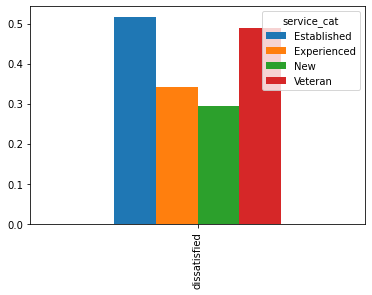

In [17]:
dissatisfied_by_service = pd.pivot_table(combined, values='dissatisfied', columns='service_cat', aggfunc='mean')
import matplotlib.pyplot as plt
%matplotlib inline
dissatisfied_by_service.plot(kind='bar')
plt.show()

It seems that the oldest employees who left the institutes tend to be employees who left more dissatisfied.

We also have the `age` columns that can give us some insights, lets take a look to see if we need to do some data cleaning in this columns as well.

In [18]:
display(combined['age'].unique().tolist())

['36-40',
 '41-45',
 '31-35',
 '46-50',
 '56-60',
 '51-55',
 '61 or older',
 '21-25',
 '26-30',
 nan,
 '20 or younger',
 '41  45',
 '56 or older',
 '46  50',
 '36  40',
 '21  25',
 '31  35',
 '26  30']

We will need to group a few categorizations that are similar or the same, but they look different. Probably because they are from different databases and this inconsistency happened when we merged them.

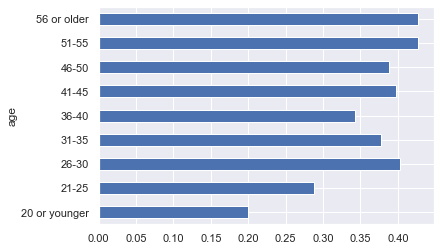

In [19]:
combined['age'] = combined['age'].str.replace('  ','-')
changes = {'56-60':'56 or older',
           '61 or older':'56 or older'
          }
combined = combined.replace({"age":changes})

import seaborn as sns
sns.set_theme()
by_age = combined.groupby('age').mean()
by_age['dissatisfied'].plot.barh()
plt.show()

We don't see much difference of insatisfaction related to age, only when the employee are below 25 years, witch might be more related to the service time that we just saw than the age by itself.

Lets now take a look at the institute service time without the aggregation and separating they by institute.

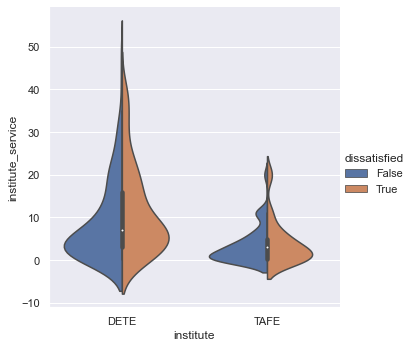

In [20]:
sns.catplot(data=combined, kind="violin", x="institute", y="institute_service", hue="dissatisfied", split=True)

In the case of DETE, most employees who leave the institution before 10 years are satisfied, but after 10 years, employees who stay and leave the institute try to leave it more dissatisfied.

With those analysis we were able to answer both of the initial questions:

 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? **They are not, leave more due to better job offers, career change, any other reasons**. What about employees who have been there longer? **Those are more insatisfied when leaving**
 - Are younger employees resigning due to some kind of dissatisfaction? **They are not**. What about older employees? **Those are more insatisfied when leaving**

### 13. Additional analysis

Let's quickly look at the dissatisfied employees by position

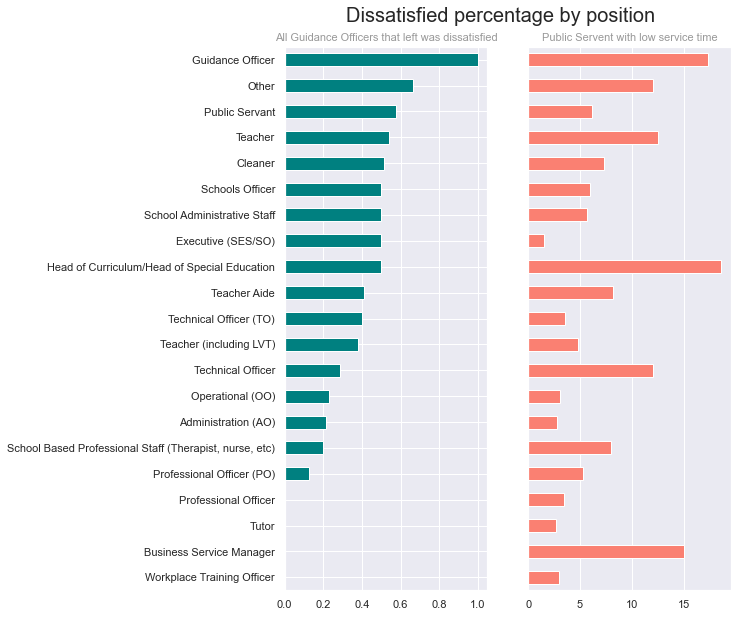

In [21]:
by_position = combined.groupby('position').mean()
by_position = by_position.sort_values('dissatisfied')

plt.figure(figsize=(11,8))

plt.subplot(1,2,1)
by_position['dissatisfied'].plot.barh(figsize=(8,10), color='teal')
plt.suptitle('Dissatisfied percentage by position',y=0.935, size = 20)
plt.title('All Guidance Officers that left was dissatisfied',alpha=0.8, size=11, color='grey')
plt.ylabel('')

plt.subplot(1,2,2)
by_position['institute_service'].plot.barh(figsize=(8,10), color='salmon')
plt.title('Public Servent with low service time',alpha=0.8, size=11, color='grey')
plt.ylabel('')
plt.yticks([])
plt.show()

plt.show()

### 14. Conclusion of the additional analysis

We could see that the disatisfaction when leaving also strongly depend on the position

Worst positions:
1. Public Servent: With relatively low service time (**6 years**) and almost **60%** disatisfaction when leaving.
2. Guidance Officer: With over **16 years** of service time and **100%** disatisfaction when leaving.

Best positions:
1. Business Service Manager: With **15 years** of service time and **without any data of disatisfaction** when leaving.
2. Scholl Based Professional Staff: With over **7 years** of service time and only **20%** disatisfaction when leaving.